# Exploring Altair

Following along with https://towardsdatascience.com/how-to-create-interactive-and-elegant-plot-with-altair-8dd87a890f2a. I've had this tutorial by Khuyen Tran on Medium bookmarked as "to try" for a long time and today, I just decided to try it.

### Thoughts on Altair
It's clearly a very pretty data viz library. I really struggled to load the charts in Jupyter Notebook. I did follow the advice in the error message so helpfully provided by the creaters of Altair, but without any luck. I made sure I had altair and vega installed and was on at least version 6 of notebook, also kept calling and uncalling the enabler (which I was convinced I didn't need being on a newer version), but still kept getting the same error message. A lot of the solutions I kept finding only mentioned Jupyter*Lab*; I wasn't really aware there was a difference but I decided to switch to it just in case and what do you know it suddenly works  (without the enabler code).

I still don't really know the difference other than the interface in JupyterLab seems cleaner and more compact.


### Thoughts on the tutorial
It was very much an intro to what Altair can do; I suppose I was hoping it was also an introduction to its syntax. For example, in the cells below you'll see I tried chart1 in two ways: the way the tutorial defined the x and y axes with alt.X() and alt.Y() as the .encode() parameters and the way the documentation defines its initial chart with simply x="" and y="" as the .encode() parameters. I would hope the difference would be covered in materials going more in depth on the syntax.

My next step will be to find something that helps me get to grips with understanding the syntax and "order of operations". I've been using the Pluralsight platform for about a month now and I do like it despite it being video-based learning (I've found I do much better with text-based). However, they do not have any videos on Altair.

Note: I decided to dive into this tutorial as a distraction from learning JavaScript, which so far I've found to be not as intuitive and more fiddly than Python. I've decided to keep going back to JS though because it seems most advanced plotting libraries in Python are built with it. Theoretically then, the more I know about JS, perhaps the more I know how the library works/will react.

-------------------------------------

In [1]:
import altair as alt
import pandas as pd

from vega_datasets import data as vega_data

In [2]:
gap = pd.read_json(vega_data.gapminder.url)
gap.head(10)

,year,country,cluster,pop,life_expect,fertility
0,1955,Afghanistan,0,8891209,30.332,7.7000
1,1960,Afghanistan,0,9829450,31.997,7.7000
2,1965,Afghanistan,0,10997885,34.020,7.7000
3,1970,Afghanistan,0,12430623,36.088,7.7000
4,1975,Afghanistan,0,14132019,38.438,7.7000
5,1980,Afghanistan,0,15112149,39.854,7.8000
6,1985,Afghanistan,0,13796928,40.822,7.9000
7,1990,Afghanistan,0,14669339,41.674,8.0000
8,1995,Afghanistan,0,20881480,41.763,8.0000
9,2000,Afghanistan,0,23898198,42.129,7.4792


In [3]:
gap.year.unique()

array([1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005],
      dtype=int64)

In [4]:
gap2005 = gap.loc[gap.year==2005]
gap2005

,year,country,cluster,pop,life_expect,fertility
10,2005,Afghanistan,0,29928987,43.828,7.0685
21,2005,Argentina,3,39537943,75.320,2.2540
32,2005,Aruba,3,71566,74.239,2.0400
43,2005,Australia,4,20090437,81.235,1.7880
54,2005,Austria,1,8184691,79.829,1.4200
...,...,...,...,...,...,...
648,2005,Switzerland,1,7489370,81.701,1.4200
659,2005,Turkey,1,69660559,71.777,2.1430
670,2005,United Kingdom,1,60441457,79.425,1.8150
681,2005,United States,3,295734134,78.242,2.0540


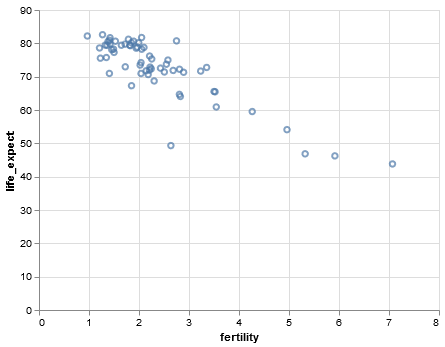

In [22]:
chart1a = alt.Chart(gap2005).mark_point().encode(
    x="fertility",
    y="life_expect")

chart1a

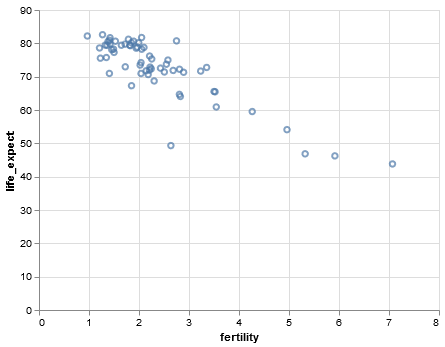

In [23]:
chart1b = alt.Chart(gap2005).mark_point().encode(
    alt.X("fertility"),
    alt.Y("life_expect")
)

chart1b

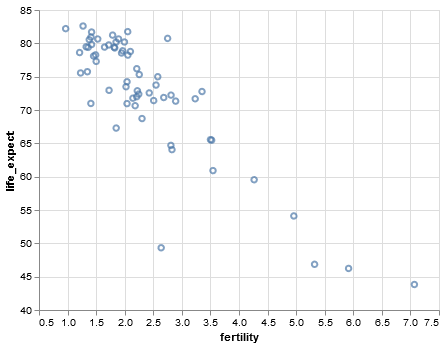

In [9]:
# adjust scale
alt.Chart(gap2005).mark_point().encode(
    alt.X("fertility", scale=alt.Scale(zero=False)),
    alt.Y("life_expect", scale=alt.Scale(zero=False))
)

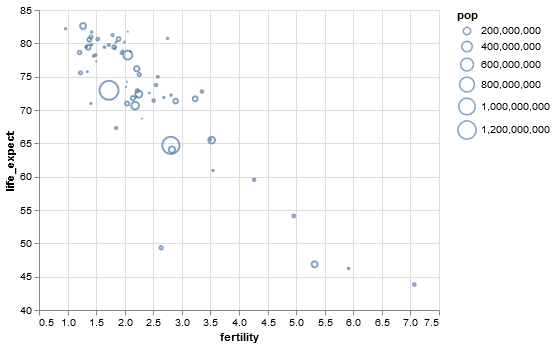

In [13]:
# add size dimension
alt.Chart(gap2005).mark_point().encode(
    alt.X("fertility", scale=alt.Scale(zero=False)),
    alt.Y("life_expect", scale=alt.Scale(zero=False)),
    alt.Size("pop")
)

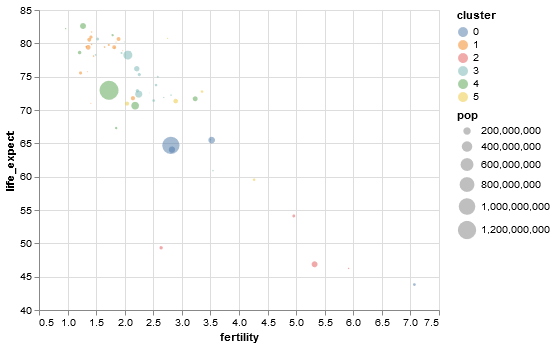

In [16]:
# add color dimension
# also specify data type
### "column.N" = nominal aka categories
### "column.Q" = quantitative aka numerical data
### "column.O" = ordinal
### "column.T" = temporal

alt.Chart(gap2005).mark_point(filled=True).encode(
    alt.X("fertility:Q", scale=alt.Scale(zero=False)),
    alt.Y("life_expect:Q", scale=alt.Scale(zero=False)),
    alt.Size("pop:Q"),
    alt.Color("cluster:N"),
    alt.OpacityValue(0.5)
)

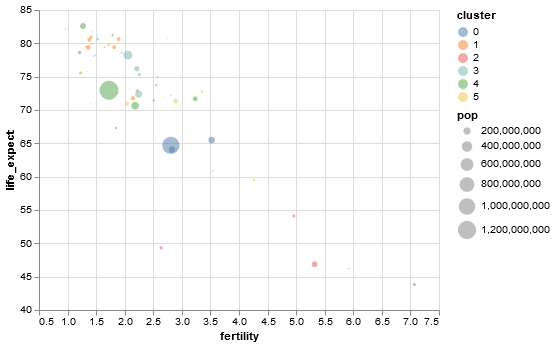

In [18]:
# adding tooltips on hover
alt.Chart(gap2005).mark_point(filled=True).encode(
    alt.X('fertility:Q', scale=alt.Scale(zero=False)),
    alt.Y('life_expect:Q', scale=alt.Scale(zero=False)),
    alt.Size('pop:Q'),
    alt.Color('cluster:N'),
    alt.OpacityValue(0.5),
    alt.Order('pop:Q', sort='descending'),
    tooltip = [alt.Tooltip('country:N'),
               alt.Tooltip('fertility:Q'),
               alt.Tooltip('life_expect:Q')]
)

# Adding interactivity

### Select single point
alt.selection_single() enables us to click one point to highlight it.
Also use alt.condition() bc we want other points to be greyed out.

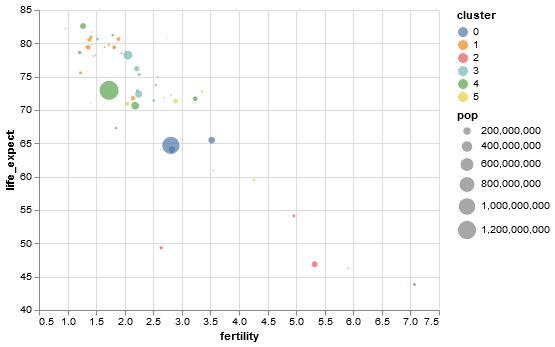

In [19]:
selection = alt.selection_single();
alt.Chart(gap2005).mark_point(filled=True).encode(
    alt.X('fertility:Q', scale=alt.Scale(zero=False)),
    alt.Y('life_expect:Q', scale=alt.Scale(zero=False)),
    alt.Size('pop:Q'),
    alt.Order('pop:Q', sort='descending'),
    tooltip = [alt.Tooltip('country:N'),
               alt.Tooltip('fertility:Q'),
               alt.Tooltip('life_expect:Q')],
    color=alt.condition(selection, 'cluster:N', alt.value('grey'))
).add_selection(selection)

### Selecting multiple points
Use alt.selection_multi() or alt.selection_interval()

In [20]:
def plot(selection):
    return alt.Chart(gap2005).mark_point(filled=True).encode(
    alt.X('fertility:Q', scale=alt.Scale(zero=False)),
    alt.Y('life_expect:Q', scale=alt.Scale(zero=False)),
    alt.Size('pop:Q'),
    alt.Order('pop:Q', sort='descending'),
    tooltip = [alt.Tooltip('country:N'),
               alt.Tooltip('fertility:Q'),
               alt.Tooltip('life_expect:Q')],
    color=alt.condition(selection, 'cluster:N', alt.value('grey'))
).add_selection(selection)

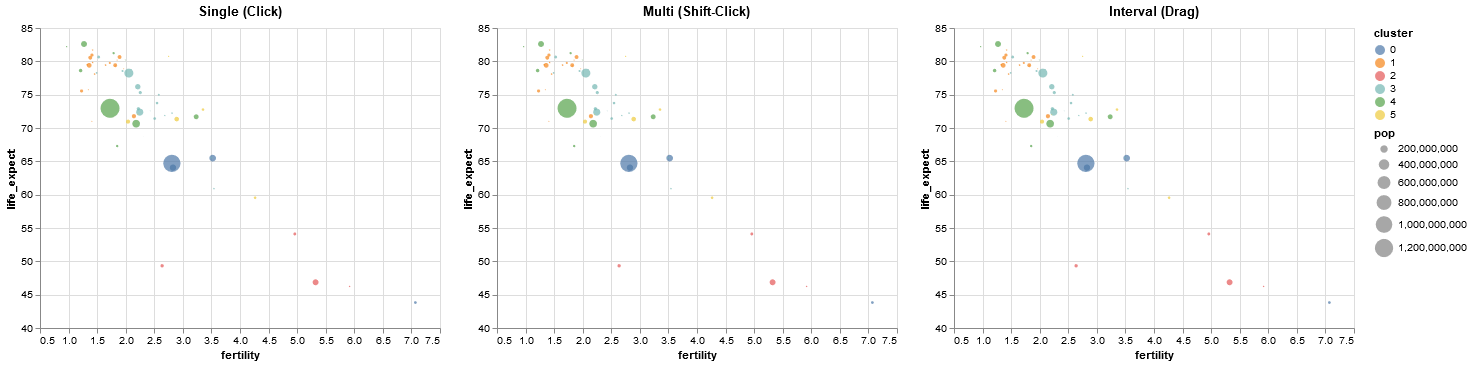

In [21]:
alt.hconcat(
  plot(alt.selection_single()).properties(title='Single (Click)'),
  plot(alt.selection_multi()).properties(title='Multi (Shift-Click)'),
  plot(alt.selection_interval()).properties(title='Interval (Drag)')
)